In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [ ]:
nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/training',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')


Found 1437 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


Text(0.5, 0, 'Class')

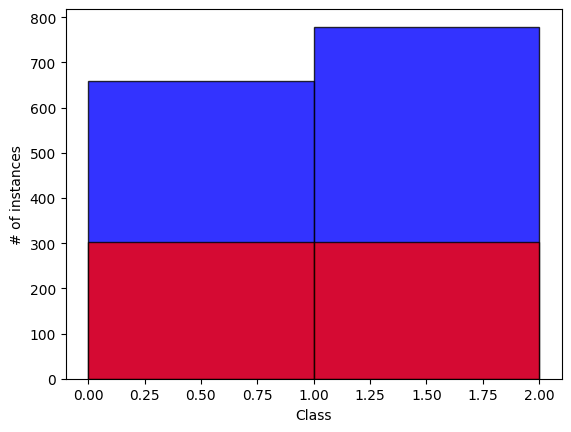

In [ ]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

(128, 128, 128, 3) (128,)


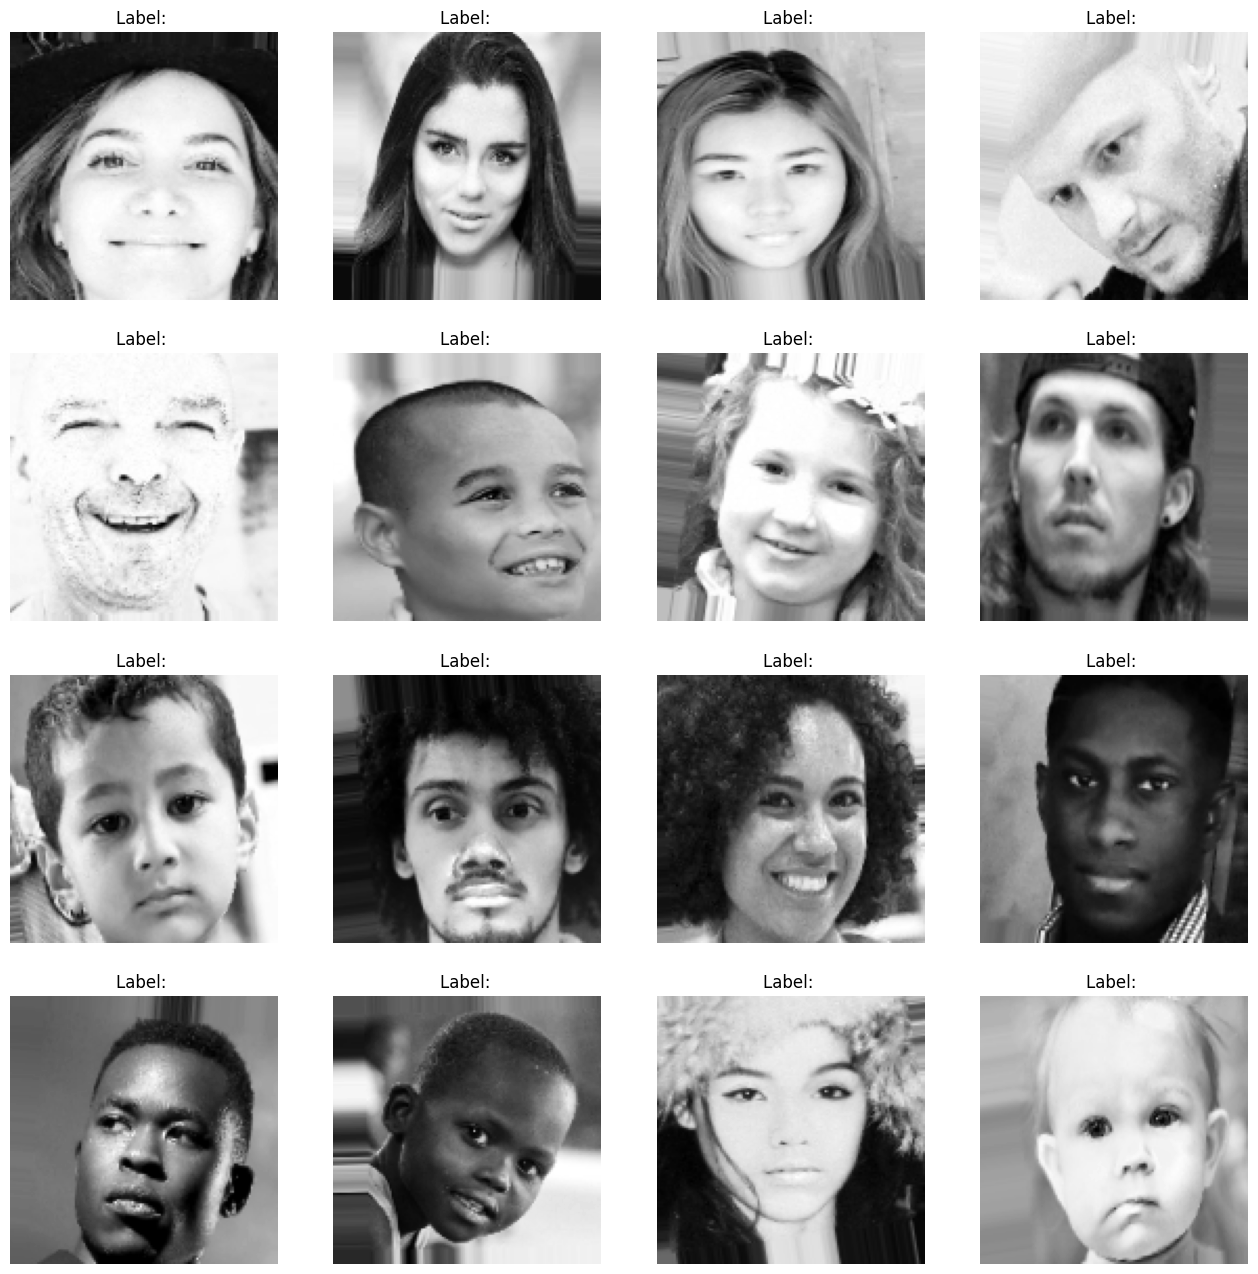

In [ ]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]


In [ ]:
history = model.fit_generator(
        training_set,
        steps_per_epoch=8,
        epochs=10,
        validation_data=test_set,
        validation_steps=28,
        callbacks = callbacks_list
    )

<ipython-input-10-10520267bfda>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.3717 - accuracy: 0.4908 

8/8 [==============================] - 633s 85s/step - loss: 1.3717 - accuracy: 0.4908 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 0.6975 - accuracy: 0.5176

8/8 [==============================] - 68s 8s/step - loss: 0.6975 - accuracy: 0.5176
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5643

8/8 [==============================] - 46s 6s/step - loss: 0.6895 - accuracy: 0.5643
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.6895 - accuracy: 0.5469

8/8 [==============================] - 51s 6s/step - loss: 0.6895 - accuracy: 0.5469
Epoch 5/10
8/8 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5416

8/8 [==============================] - 46s 5s/step - loss: 0.6919 - accuracy: 0.5416
Epoch 6/10
8/8 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5352

8/8 [==============================] - 51s 6s/step - loss: 0.6890 - accuracy: 0.5352
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 0.6902 - accuracy: 0.5524

8/8 [==============================] - 45s 5s/step - loss: 0.6902 - accuracy: 0.5524
Epoch 8/10
8/8 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319

8/8 [==============================] - 45s 5s/step - loss: 0.6915 - accuracy: 0.5319
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 0.6893 - accuracy: 0.5492

8/8 [==============================] - 46s 5s/step - loss: 0.6893 - accuracy: 0.5492
Epoch 10/10
8/8 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5341

8/8 [==============================] - 46s 5s/step - loss: 0.6932 - accuracy: 0.5341


In [ ]:
training_set.class_indices

{'fake': 0, 'real': 1}

In [ ]:
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

Enter Location of Image to predict: /content/garv .jpg
1/1 [==============================] - 0s 51ms/step
Prediction:  Fake


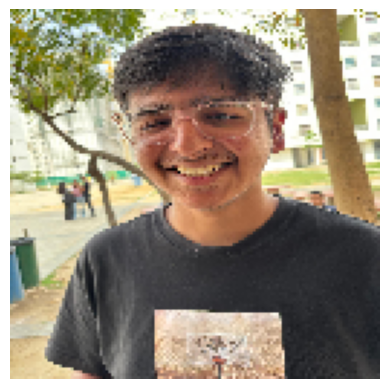

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)

Enter Location of Image to predict: /content/premium_photo-1664392224000-298a3b49a41e.jpeg
1/1 [==============================] - 0s 43ms/step
Prediction:  Real


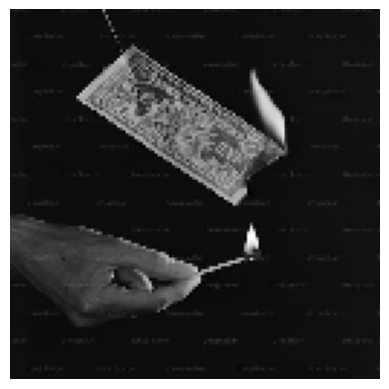

In [ ]:
img = input("Enter Location of Image to predict: ")
test_image_6 = ImagePrediction(img)